## Extra credit project
### By Yixuan T
### Dec 2017

In [475]:
import pandas as pd
import savReaderWriter
import numpy as np
import pylab as pl
import os
import json
import urllib
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree
import scipy
import scipy.stats
from IPython.display import Image

In [476]:
#spss data prepared by R
wave5 = pd.read_csv('df.csv')

In [477]:
wave5.shape

(10274, 5756)

In [478]:
wave5.head(2)

idauniq        headldr        headlwa        headlba        headlea  \
0   100001  Not mentioned  Not mentioned  Not mentioned  Not mentioned   
1   100005  Not mentioned  Not mentioned  Not mentioned  Not mentioned   

         headlbe        headlwc        headlma        headlda        headlpr  \
0  Not mentioned  Not mentioned  Not mentioned  Not mentioned  Not mentioned   
1  Not mentioned  Not mentioned  Not mentioned  Not mentioned  Not mentioned   

    ...   NClm NCorrect NMissed NRowClm cfmeind         nnmisrc  \
0   ...     -1       -1      -1      -1      -1  Not applicable   
1   ...      1       21       3     301      18        3 missed   

                   cfspeed  cfexind  cfind cfaccur  
0           Not applicable       -1     -1    -1.0  
1  300-324 items completed       18     36    87.5  

[2 rows x 5756 columns]

In [479]:
# Perceived discrimination variable scdtdre	scdtdst	scdtdcl	scdtdha	scdtddr
wave5.scfami.unique()

array(['Schedule Not Applicable', 'Every few months',
       'Less than once a year or never', 'Once or twice a week',
       'Once or twice a month', 'Not answered', 'Item not applicable',
       'Once or twice a year', 'Three or more times a week'], dtype=object)

In [27]:
wave5.indobyr.describe()

count    10274.000000
mean      1918.050224
std        221.478761
min         -7.000000
25%       1936.000000
50%       1945.000000
75%       1951.000000
max       1984.000000
Name: indobyr, dtype: float64

In [480]:
# only select the useful column
df = wave5[['indsex','indobyr','wpdes','iasinc','hehelf', 'scdtdre','scdtdst','scdtdcl','scdtdha','scdtddr',
           'scdtd01','scdtd02','scdtd03','scdtd04','scdtd05','scdtd06','scdtd07','scdtd08','scdtd85']]

In [481]:
df.head(5)

indsex  indobyr     wpdes   iasinc               hehelf  \
0   Male     1951  Employed  32000.0  Item not applicable   
1   Male     1947   Retired     -1.0           very good,   
2   Male     1951  Employed    200.0           very good,   
3   Male     1948  Employed  18686.0           very good,   
4   Male     1940   Retired   5000.0           very good,   

                   scdtdre                  scdtdst                  scdtdcl  \
0  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
1                    Never                 Disagree                 Disagree   
2                    Never                 Disagree                 Disagree   
3                    Never                 Disagree                 Disagree   
4                    Never                 Disagree                 Disagree   

                   scdtdha                  scdtddr                  scdtd01  \
0  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
1                 Disagree                 Disagree             Not answered   
2                 Disagree                 Disagree             Not answered   
3                 Disagree                 Disagree             Not answered   
4                 Disagree                 Disagree             Not answered   

                   scdtd02                  scdtd03                  scdtd04  \
0  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
1             Not answered             Not answered             Not answered   
2             Not answered             Not answered             Not answered   
3             Not answered             Not answered             Not answered   
4             Not answered             Not answered             Not answered   

                   scdtd05                  scdtd06                  scdtd07  \
0  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
1             Not answered             Not answered             Not answered   
2             Not answered             Not answered             Not answered   
3             Not answered             Not answered             Not answered   
4             Not answered             Not answered             Not answered   

                   scdtd08                  scdtd85  
0  Schedule Not Applicable  Schedule Not Applicable  
1             Not answered             Not answered  
2             Not answered             Not answered  
3             Not answered             Not answered  
4             Not answered             Not answered

In [474]:
# 5 parameters scdtdre	scdtdst	scdtdcl	scdtdha	scdtddr

In [482]:
df['featurescdtdre'] = df.scdtdre.map({'Never':0,
                                        'Less than once a year':1,
                                        'A few times a year':2,
                                        'At least once a week':4,
                                        'A few times a month':3,
                                        'Almost every day':5})

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [483]:
for i in ['scdtdst','scdtdcl','scdtdha','scdtddr']:
    df['feature'+i] = df[i].map({'Disagree':0,
                                'Slightly disagree':1,
                                'Neither agree nor disagree':2,
                                'Slightly agree':3,
                                'Agree':4,'Strongly agree':5})

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [484]:
df.head(10)

indsex  indobyr     wpdes   iasinc               hehelf  \
0    Male     1951  Employed  32000.0  Item not applicable   
1    Male     1947   Retired     -1.0           very good,   
2    Male     1951  Employed    200.0           very good,   
3    Male     1948  Employed  18686.0           very good,   
4    Male     1940   Retired   5000.0           very good,   
5    Male     1947   Retired  38000.0           very good,   
6  Female     1950   Retired     -1.0  Item not applicable   
7  Female     1959  Employed  23000.0                good,   
8    Male     1929   Retired     -1.0                fair,   
9    Male     1931   Retired     -1.0           very good,   

                   scdtdre                  scdtdst                  scdtdcl  \
0  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
1                    Never                 Disagree                 Disagree   
2                    Never                 Disagree                 Disagree   
3                    Never                 Disagree                 Disagree   
4                    Never                 Disagree                 Disagree   
5    Less than once a year                 Disagree                 Disagree   
6  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
7  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
8                    Never                 Disagree                 Disagree   
9    Less than once a year                 Disagree                 Disagree   

                   scdtdha                  scdtddr       ...        \
0  Schedule Not Applicable  Schedule Not Applicable       ...         
1                 Disagree                 Disagree       ...         
2                 Disagree                 Disagree       ...         
3                 Disagree                 Disagree       ...         
4                 Disagree                 Disagree       ...         
5                 Disagree                 Disagree       ...         
6  Schedule Not Applicable  Schedule Not Applicable       ...         
7  Schedule Not Applicable  Schedule Not Applicable       ...         
8                 Disagree                 Disagree       ...         
9                 Disagree                 Disagree       ...         

                   scdtd05                  scdtd06                  scdtd07  \
0  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
1             Not answered             Not answered             Not answered   
2             Not answered             Not answered             Not answered   
3             Not answered             Not answered             Not answered   
4             Not answered             Not answered             Not answered   
5                       No                       No                       No   
6  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
7  Schedule Not Applicable  Schedule Not Applicable  Schedule Not Applicable   
8             Not answered             Not answered             Not answered   
9             Not answered             Not answered             Not answered   

                   scdtd08                  scdtd85 featurescdtdre  \
0  Schedule Not Applicable  Schedule Not Applicable            NaN   
1             Not answered             Not answered            0.0   
2             Not answered             Not answered            0.0   
3             Not answered             Not answered            0.0   
4             Not answered             Not answered            0.0   
5                       No                       No            1.0   
6  Schedule Not Applicable  Schedule Not Applicable            NaN   
7  Schedule Not Applicable  Schedule Not Applicable            NaN   
8             Not answered             Not answered            0.0   
9             Not answered             Not answered            1.0   

  fea

In [485]:
df.shape

(10274, 24)

In [486]:
df.dropna(inplace=True) # drop Schedule Not Applicable and Not answered, we still got 8703 observations

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [487]:
df.shape

(8703, 24)

In [488]:
df.indobyr.describe()

count    8703.000000
mean     1924.852465
std       192.042066
min        -7.000000
25%      1937.000000
50%      1945.000000
75%      1951.000000
max      1981.000000
Name: indobyr, dtype: float64

In [489]:
len(df[df.iasinc>0])

3547

In [490]:
# get rid of strange values
Crit1 = df.indobyr > 0
Crit2 = df.iasinc > 0
AllCrit = Crit1 & Crit2

In [491]:
finaldf = df[AllCrit]

In [492]:
finaldf.indobyr = 2011 - finaldf.indobyr

In [495]:
finaldf.hehelf.describe()

count           3545
unique             7
top       very good,
freq            1328
Name: hehelf, dtype: object

In [ ]:
finaldf.hehelf.replace('very good,', 3, inplace = True)
finaldf.hehelf.replace('fair,', 1, inplace = True)
finaldf.hehelf.replace('good,', 2, inplace = True)
finaldf.hehelf.replace('...excellent,', 4, inplace = True)
finaldf.hehelf.replace('or, poor?', 0, inplace = True)
finaldf.hehelf.replace("Don't Know", 1, inplace = True)
finaldf.hehelf.replace("Refusal", 1, inplace = True)

In [496]:
finaldf.indsex.replace('Male', 0, inplace = True)
finaldf.indsex.replace('Female', 1, inplace = True)

## Descriptive analysis
### Some visualization

In [501]:
finaldf.shape

(3545, 25)

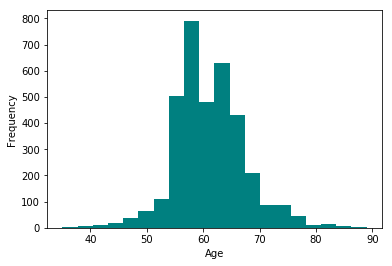

In [508]:
finaldf.indobyr.plot('hist', bins =20, color = 'teal')
pl.xlabel('Age')
pl.show()

### Fig1. Age distribution in data

In [499]:
#create perceived discrimination score
finaldf['DisScore'] = finaldf['featurescdtdre'] + finaldf['featurescdtdst'] +\
finaldf['featurescdtdcl']+finaldf['featurescdtdha']+ finaldf['featurescdtddr']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


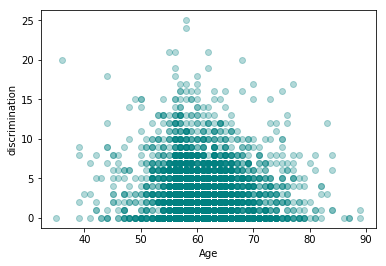

In [500]:
pl.scatter(finaldf.indobyr,finaldf.DisScore, color = 'teal', alpha=0.3)
pl.xlabel('Age')
pl.ylabel('discrimination')
pl.show()

### Fig2. Discrimination distribution by age

In [283]:
# You are treated with less courtesy or respect than other people
scdtdreX = []
for i in finaldf.scdtdre.unique():
    a = len(finaldf[finaldf['scdtdre']== i])
    print i,":",a
    scdtdreX.append(a)

Never : 1253
Less than once a year : 982
A few times a year : 753
At least once a week : 183
Almost every day : 57
A few times a month : 317


In [284]:
# You receive poorer service than other people at restaurants or stores
scdtdstX = []
for i in finaldf.scdtdst.unique():
    a = len(finaldf[finaldf['scdtdst']== i])
    print i,":",a
    scdtdstX.append(a)

Disagree : 1943
Slightly disagree : 1044
Neither agree nor disagree : 421
Slightly agree : 96
Agree : 35
Strongly agree : 6


In [285]:
# People act as if they think you are not clever
scdtdclX = []
for i in finaldf.scdtdcl.unique():
    a = len(finaldf[finaldf['scdtdcl']== i])
    print i,":",a
    scdtdclX.append(a)

Disagree : 2023
Neither agree nor disagree : 423
Slightly disagree : 865
Slightly agree : 133
Agree : 76
Strongly agree : 25


In [286]:
# You are threatened or harassed
scdtdhaX = []
for i in finaldf.scdtdha.unique():
    a = len(finaldf[finaldf['scdtdha']== i])
    print i,":",a
    scdtdhaX.append(a)

Disagree : 2448
Slightly disagree : 752
Slightly agree : 64
Agree : 32
Neither agree nor disagree : 231
Strongly agree : 18


In [287]:
# You receive poorer service or treatment than other people from doctors or hospitals
scdtddrX = []
for i in finaldf.scdtddr.unique():
    a = len(finaldf[finaldf['scdtddr']== i])
    print i,":",a
    scdtddrX.append(a)

Disagree : 2914
Slightly agree : 15
Slightly disagree : 519
Neither agree nor disagree : 88
Agree : 7
Strongly agree : 2


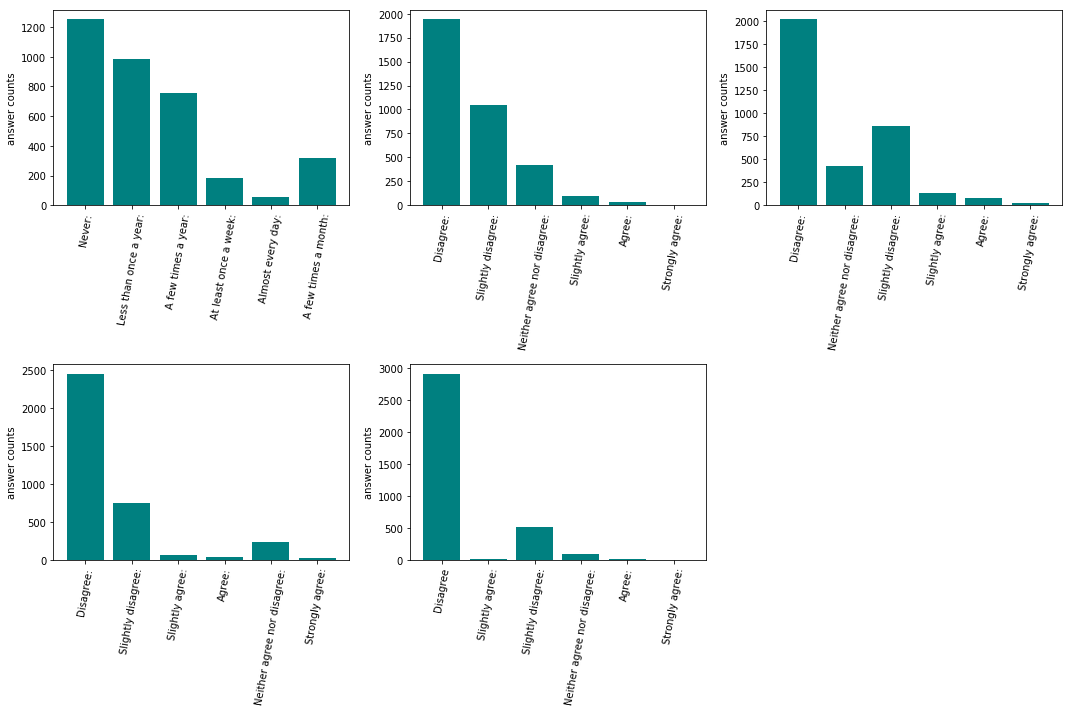

In [468]:
# use hist plot to visualize
fig = pl.figure(figsize = (15,10))

ax = fig.add_subplot(231)
pl.bar(range(6), scdtdreX, color = 'teal')
pl.ylabel('answer counts')
pl.xticks(range(6), ('Never:','Less than once a year:',
                     'A few times a year:',
                     'At least once a week:',
                     'Almost every day:',
                     'A few times a month:'), rotation = 80)

ax = fig.add_subplot(232)
pl.bar(range(6), scdtdstX, color = 'teal')
pl.ylabel('answer counts')
pl.xticks(range(6), ('Disagree:',
                     'Slightly disagree:',
                     'Neither agree nor disagree:',
                     'Slightly agree:',
                     'Agree:',
                     'Strongly agree:'), rotation = 80)

ax = fig.add_subplot(233)
pl.bar(range(6), scdtdclX, color = 'teal')
pl.ylabel('answer counts')
pl.xticks(range(6), ('Disagree:','Neither agree nor disagree:',
                     'Slightly disagree:',
                     'Slightly agree:',
                     'Agree:',
                     'Strongly agree:'), rotation = 80)

ax = fig.add_subplot(234)
pl.bar(range(6), scdtdhaX, color = 'teal')
pl.ylabel('answer counts')
pl.xticks(range(6), ('Disagree:',
                     'Slightly disagree:','Slightly agree:',
                     'Agree:','Neither agree nor disagree:',
                     'Strongly agree:'), rotation = 80)

ax = fig.add_subplot(235)
pl.bar(range(6), scdtddrX, color = 'teal')
pl.ylabel('answer counts')
pl.xticks(range(6), ('Disagree','Slightly agree:',
                     'Slightly disagree:',
                     'Neither agree nor disagree:',
                     'Agree:','Strongly agree:'),rotation = 80)
pl.tight_layout()
pl.show()
fig.savefig('comparison.jpg')

### Fig3. Comparison of answer distribution of 5 questions

In [289]:
finaldf.drop(finaldf.columns[4:9], axis = 1, inplace= True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [502]:
finaldf.DisScore.describe()

count    3545.000000
mean        3.311989
std         3.452064
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        25.000000
Name: DisScore, dtype: float64

### Ratio of perceived discrimination in respondents

In [509]:
ratio = len(finaldf[finaldf.DisScore > 0]) * 100/ len(finaldf)
print('In the %d valid respondents'%finaldf.shape[0], '%d%% of them think they perceived discrimination in life'%ratio)

('In the 3545 valid respondents', '72% of them think they perceived discrimination in life')


### Reason for discrimination(Self report)

In [293]:
finaldf = finaldf.rename(columns={'scdtd01':'gender', 'scdtd02':'race', 'scdtd03':'age','scdtd04':'weight',
                        'scdtd05':'physical disability', 'scdtd06': 'appearance','scdtd07':'sexual orientation',
                        'scdtd08':'financial status','scdtd85':'Other'}, )

In [294]:
for i in ['gender', 'race','age','weight','physical disability', 'appearance', 'sexual orientation',
          'financial status','Other']:
    print('Reason for discrimination(Self report):'+i,len(finaldf[finaldf[i] == 'Yes']))

('Reason for discrimination(Self report):gender', 432)
('Reason for discrimination(Self report):race', 72)
('Reason for discrimination(Self report):age', 1043)
('Reason for discrimination(Self report):weight', 200)
('Reason for discrimination(Self report):physical disability', 64)
('Reason for discrimination(Self report):appearance', 158)
('Reason for discrimination(Self report):sexual orientation', 23)
('Reason for discrimination(Self report):financial status', 248)
('Reason for discrimination(Self report):Other', 4)


* From this, we can see that most people perceived discrimination think the cause is their age, and the second and third causation is gender and financial status respectively.

## Regression analysis

* How well does discrimination relate to age and financial status?

In [346]:
X = finaldf[['indobyr']]
y = finaldf.DisScore
X=sm.add_constant(X)

In [349]:
Amodel = smf.OLS(y, X).fit()
Amodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DisScore   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     29.92
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.80e-08
Time:                        18:00:54   Log-Likelihood:                -9406.9
No. Observations:                3545   AIC:                         1.882e+04
Df Residuals:                    3543   BIC:                         1.883e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4337      0.574     11.217      0.000       5.309       7.558
indobyr       -0.0511      0.009     -5.470      0.000      -0.069      -0.033
==============================================================================
Omnibus:                      900.659   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2206.748
Skew:                           1.390   Prob(JB):                         0.00
Kurtosis:                       5.685   Cond. No.                         610.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The adjusted R^2 indicates 0.8% of the variability is accounted for by this model

In [351]:
X = finaldf[['iasinc']]
y = finaldf.DisScore
X=sm.add_constant(X)

In [352]:
Fmodel = sm.OLS(y,X).fit()

In [353]:
Fmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DisScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03103
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.860
Time:                        18:01:45   Log-Likelihood:                -9421.8
No. Observations:                3545   AIC:                         1.885e+04
Df Residuals:                    3543   BIC:                         1.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3224      0.083     40.070      0.000       3.160       3.485
iasinc     -3.674e-07   2.09e-06     -0.176      0.860   -4.46e-06    3.72e-06
==============================================================================
Omnibus:                      915.497   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2270.336
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                       5.728   Cond. No.                     5.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [354]:
X = finaldf[['indobyr','iasinc']]
y = finaldf.DisScore
X=sm.add_constant(X)

In [355]:
Bmodel = sm.OLS(y,X).fit()

In [356]:
Bmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DisScore   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     17.11
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.01e-08
Time:                        18:01:50   Log-Likelihood:                -9404.7
No. Observations:                3545   AIC:                         1.882e+04
Df Residuals:                    3542   BIC:                         1.883e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9679      0.629     11.081      0.000       5.735       8.201
indobyr       -0.0578      0.010     -5.848      0.000      -0.077      -0.038
iasinc     -4.538e-06    2.2e-06     -2.067      0.039   -8.84e-06   -2.35e-07
==============================================================================
Omnibus:                      896.467   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2189.966
Skew:                           1.385   Prob(JB):                         0.00
Kurtosis:                       5.674   Cond. No.                     4.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### NULL HYPOTHESIS: the ratio of female experienced discrimination is the same or lower than male in this survey, at significance level p=0.05.

In [410]:
alpha = 0.05

In [411]:
finaldf.head(5)

indsex  indobyr     wpdes   iasinc        gender          race  \
2        0       60  Employed    200.0  Not answered  Not answered   
3        0       63  Employed  18686.0  Not answered  Not answered   
4        0       71   Retired   5000.0  Not answered  Not answered   
5        0       64   Retired  38000.0            No            No   
11       1       61  Employed  46000.0            No            No   

             age        weight physical disability    appearance  \
2   Not answered  Not answered        Not answered  Not answered   
3   Not answered  Not answered        Not answered  Not answered   
4   Not answered  Not answered        Not answered  Not answered   
5             No            No                  No            No   
11            No            No                  No            No   

   sexual orientation financial status         Other  featurescdtdre  \
2        Not answered     Not answered  Not answered             0.0   
3        Not answered     Not answered  Not answered             0.0   
4        Not answered     Not answered  Not answered             0.0   
5                  No               No            No             1.0   
11                 No               No            No             2.0   

    featurescdtdst  featurescdtdcl  featurescdtdha  featurescdtddr  DisScore  
2              0.0             0.0             0.0             0.0       0.0  
3              0.0             0.0             0.0             0.0       0.0  
4              0.0             0.0             0.0             0.0       0.0  
5              0.0             0.0             0.0             0.0       1.0  
11             0.0             0.0             0.0             0.0       2.0

In [412]:
Ztestdf = finaldf[['indsex','DisScore']]

In [413]:
n_0 = len(Ztestdf[Ztestdf.indsex == 0])
n_1 = len(Ztestdf[Ztestdf.indsex == 1])
Nt_0 = len(Ztestdf[(Ztestdf.indsex == 0) & (Ztestdf.DisScore >0)])
Nt_1 = len(Ztestdf[(Ztestdf.indsex == 1) & (Ztestdf.DisScore >0)])

In [414]:
print('male sample:%d'%n_0, 'female smaple:%d'%n_1)

('male sample:1674', 'female smaple:1871')


In [415]:
print('Perceived discrimination counts in men: %d'%Nt_0)
print('Perceived discrimination counts in women: %d'%Nt_1)

Perceived discrimination counts in men: 1243
Perceived discrimination counts in women: 1316


In [416]:
def stdev(p, n):
    x = np.sqrt(p * ( 1 - p ) / n[0] +  p * ( 1 - p ) / n[1])
    return x
sp_stdev_2y = stdev((float(Nt_0) + Nt_1) / (n_0 + n_1), [n_0, n_1])
print ( "test standard deviation error: %.10f"%sp_stdev_2y)

test standard deviation error: 0.0150747757


In [417]:
P_0 = len(Ztestdf[(Ztestdf.indsex == 0) & (Ztestdf.DisScore >0)]) / float(n_0)
P_1 = len(Ztestdf[(Ztestdf.indsex == 1) & (Ztestdf.DisScore >0)]) / float(n_1)

In [421]:
def zscore(p0, p1, s):
    score =(p0 - p1) / s
    return score
z_2y = zscore(P_0, P_1, sp_stdev_2y)
print ('z score for perceived discrimination: z = %.3f'%z_2y)

z score for perceived discrimination: z = 2.598


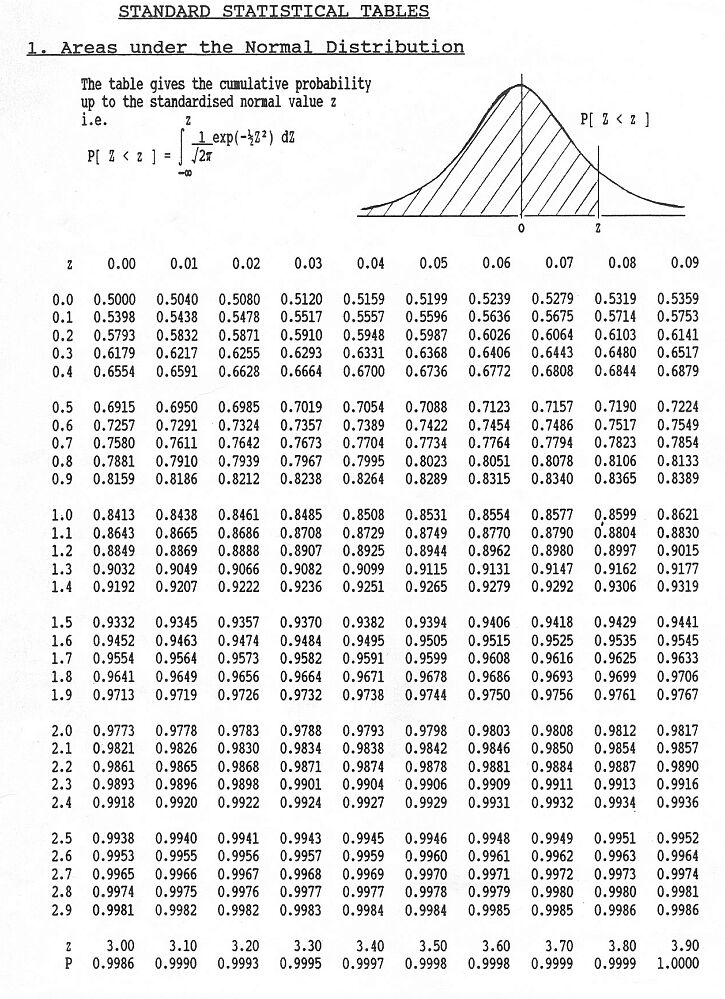

In [407]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

### if 1 - P < $\alpha$  : reject H0

In [419]:
#by search the table above, we use 0.9952
p = 1 - 0.9952
def report_result(p, a):
    print ('is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a))
    if p<a:
        print ("YES!")
    else: print ("NO!")
    
    print ('the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') )

report_result(p, alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


### We can conclude that female perceived more discrimination than male